In [1]:
# Import libaries
import re
import importlib


In [2]:
# Libary to import self-made libaries
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Brighway\Libaries')

In [3]:
# Importing self-made libaries
import standards as s
import Monte_Carlo as MC
import life_cycle_assessment as lc
import LCA_plots as lp

# Reload to reset the state of the self-made libaries
# https://dev.to/fronkan/importlib-reload-for-resting-modules-between-tests-neh
importlib.reload(s)
importlib.reload(MC)
importlib.reload(lc)
importlib.reload(lp)

<module 'LCA_plots' from 'C:\\Users\\ruw\\Desktop\\RA\\Single-use-vs-multi-use-in-health-care\\Brighway\\Libaries\\LCA_plots.py'>

In [4]:
# Specifying if it is CONSQ (consequential) or APOS
db_type = 'CONSQ'

# Specifying the LCIA method
lcia_method = 'recipe'


In [5]:

# Path to where the code is stored
path = r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Brighway'

file_identifier = 'Ananas'
res_folder_identifier = ' Ofir'

# Specifying the file name and sheet name
file_name = f'{path}\Results\{file_identifier} - {db_type}_{lcia_method}.xlsx'
sheet_name = f'{file_identifier}'

# Creating the saving directory for the results
save_dir = s.results_folder(path, 'Results', res_folder_identifier)

# Let the use decide the project and database
database_project, database_name = lc.select_project_and_database()

# Creating the flow legend
flow_legend = ['H2R',
               'H2S',
               'ASC',
               'ASW',
               'H4R',
               'H4S',
               'ALC',
               'ALW'
               ]



Folder name Results created
The chosen project is SU_vs_MU and the chosen database is sterilization


In [6]:
# flows = lc.get_database_type_flows(database_project, database_name, db_type)

# flows

In [7]:
flows = lc.get_user_specific_flows(database_project, database_name)
flows

choose 'y' if you want to calculate for this flow, and 'n' if not


['H200 REC - CONSQ',
 'H200 SU - CONSQ',
 'H400 REC- CONSQ',
 'H400 SU - CONSQ',
 'alubox large + washer - CONSQ',
 'alubox large + wipe - CONSQ',
 'alubox small + washer - CONSQ',
 'alubox small + wipe - CONSQ']

In [8]:
initialization = [database_project, database_name, flows, lcia_method, db_type]


In [51]:
import pandas as pd
import brightway2 as bw 

functional_unit, process, impact_category, plot_x_axis_all = lc.LCA_initialization(database_project, database_name, flows, lcia_method, db_type)

print('\nCalculating the LCA results:')

# Ensure impact categories is a list
impact_categories = list(impact_category) if isinstance(impact_category, tuple) else impact_category

# Create a DataFrame to store results


calc_count = 1


uniquie_process = {}
uniquie_process_results = {}
# Loop through each impact category and flow
# for col, impact in enumerate(impact_categories):
#     
    
for row_idx, f in enumerate(flows):
    df_lst = []
    
    # Find matches in functional units and calculate LCA
    for func_unit, func_dict in enumerate(functional_unit):
        for FU_key, FU_item in func_dict.items():
            if f in FU_key:
                for proc in FU_item.keys():
                    if proc not in uniquie_process.keys():
                        uniquie_process[proc] = 1

uniquie_process_index = []

for up in uniquie_process.keys():
    uniquie_process_index.append(f'{up}')

df_uniquie = pd.DataFrame(0, index=uniquie_process_index, columns=impact_categories, dtype=object)

total_calculations = len(uniquie_process)*len(impact_categories)
for col, impact in enumerate(impact_categories):
    uniquie_process_results[impact] = []
    print(f'Calculating for {impact[1]}')
    for row_idx, (key, item) in enumerate(uniquie_process.items()):
        # print(key, item)
        # Perform LCA
        lca = bw.LCA({key :item}, impact)
        lca.lci()
        lca.lcia()
        uniquie_process_results[impact].append({key: lca.score})


        # Print progress
        print(f"Calculation {calc_count}/{total_calculations}: {key},  Score: {lca.score} at col {col}, row {row_idx}")
        calc_count += 1

        # # Assign list to DataFrame cell
        df_uniquie.iat[row_idx, col] = lca.score


Recipe is selected
Initialization is completed

Calculating the LCA results:
Calculating for acidification: terrestrial
Calculation 1/441: 'market for polypropylene, granulate' (kilogram, GLO, None),  Score: 0.004640164272069189 at col 0, row 0
Calculation 2/441: 'sheet manufacturing - CONSQ' (kilogram, GLO, None),  Score: 0.0022255020919817138 at col 0, row 1
Calculation 3/441: 'packaging film production, low density polyethylene' (kilogram, RER, None),  Score: 0.006376674759669536 at col 0, row 2
Calculation 4/441: 'market for corrugated board box' (kilogram, RER, None),  Score: 0.0071862572849645855 at col 0, row 3
Calculation 5/441: 'autoclave - CONSQ' (unit, GLO, None),  Score: 0.005547151661112807 at col 0, row 4
Calculation 6/441: 'transport Plastic - CONSQ' (ton kilometer, GLO, None),  Score: 0.0003111919961497615 at col 0, row 5
Calculation 7/441: 'polyethylene, high density, granulate, recycled to generic market for high density PE granulate' (kilogram, Europe without Switzer

In [88]:

# Specifying the file name and sheet name
file_name_uniquie = f'{path}\Results\{file_identifier} - {db_type}_{lcia_method}_unq.xlsx'
sheet_name = f'{file_identifier}'
lc.save_LCIA_results(df_uniquie, file_name_uniquie, sheet_name, impact_category)

DataFrame with nested lists written to Excel successfully.


In [92]:
df_uniquie = lc.import_LCIA_results(file_name_uniquie, uniquie_process_index, impact_category)


In [117]:
df = pd.DataFrame(0, index=flows, columns=impact_categories, dtype=object)
for col in impact_categories:
    for i, row in df.iterrows():
        row[col] = []
        # print(i, row[col])

for col, impact in enumerate(impact_category):
    for fu in functional_unit:
        df_lst = []
        for key, item in fu.items():
            proc = str([p for p in item.keys()][0])
            val = float([v for v in item.values()][0])
            factor = df_uniquie.at[proc, impact]
            impact_value = val * factor
            # print(key, proc, val, factor)
            df.at[key, impact].append([proc, impact_value])
            


In [116]:
# df, impact_category, plot_x_axis_all, func_unit = lc.calculate_lcia(calculate=False, initialization=initialization, file_name=file_name, sheet_name=sheet_name)
# df

In [12]:
redo = False
df = lc.recalculate_lcia(redo, df, initialization, file_name, sheet_name)


In [118]:
rearrange = True
df_rearranged = lc.rearrange_dataframe_index(rearrange, df)

In [119]:
if 'recipe' in lcia_method:
    df_res, df_endpoint = lc.recipe_dataframe_split(df_rearranged)
    plot_x_axis_end = plot_x_axis_all[-3:]
    ic_mid = plot_x_axis_all[:-3] 
    plot_x_axis = []
    for ic in ic_mid:
        # print(ic)
        string = re.findall(r'\((.*?)\)', ic)
        plot_x_axis.append(string[0])

else:
    df_res = df_rearranged
    plot_x_axis = plot_x_axis_all


In [120]:
# if calculate_cont == True:
#     sub_proccess, amount = lc.obtaining_sub_process(sub_product_details)
#     FU_sub, FU_sub_process, idx = lc.sub_process_initilization(sub_proccess, FU, database_project, f'df_idx_ofir_{db_type}', lcia_method, db_type)
#     flow_count, flow_sub, functional_unit_sub = lc.FU_contibution_initilization(FU_sub, FU_sub_process)
#     fu_sub_updated = lc.process_update(FU, functional_unit_sub)
    
#     df_cont = lc.LCIA_contribution(impact_category[1], flow_count, FU_sub_process, fu_sub_updated, amount, idx)
#     lc.save_LCA_results(df_cont, file_cont_name, sheet_name, impact_category)
#     df_c = lc.import_LCA_results(file_cont_name, idx, impact_category[1])


In [121]:
df_tot, df_scaled = lc.dataframe_element_scaling(df_res)
df_col = [df_res.columns[1]]
df_GWP = df_res[df_col]

unique_elements = lc.unique_elements_list(database_name)
colors = s.plot_colors(unique_elements,'turbo')
# colors = [
#     "#00441B",  # Dark green
#     "#006D2C",  # less dark green
#     "#238B45",  # green
#     "#41AE76",  # slighty light green
#     "#7BCCC4",  # green/blue
#     "#41B6C4",  # light green/blue
#     "#1D91C0",  # blue
#     "#225EA8",  # slightly dark blue
#     "#253494",  # Dark blue
#     "#5F9EA0",  # Cadet Blue
#     "#B0C4DE",  # Light Steel Blue
#     "#696969",  # Dim Gray
# ]

inputs = [flow_legend, colors, save_dir, db_type, database_name]

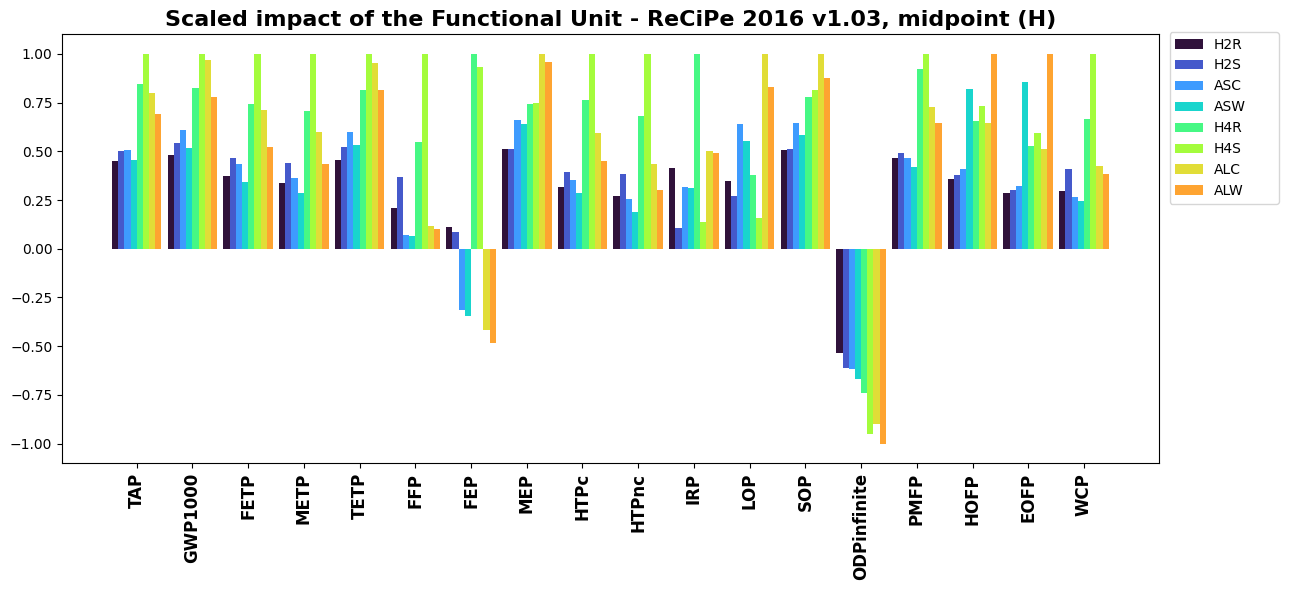

In [122]:
leg_pos_mid = .605

lp.scaled_FU_plot(df_scaled, plot_x_axis, inputs, impact_category, leg_pos_mid)

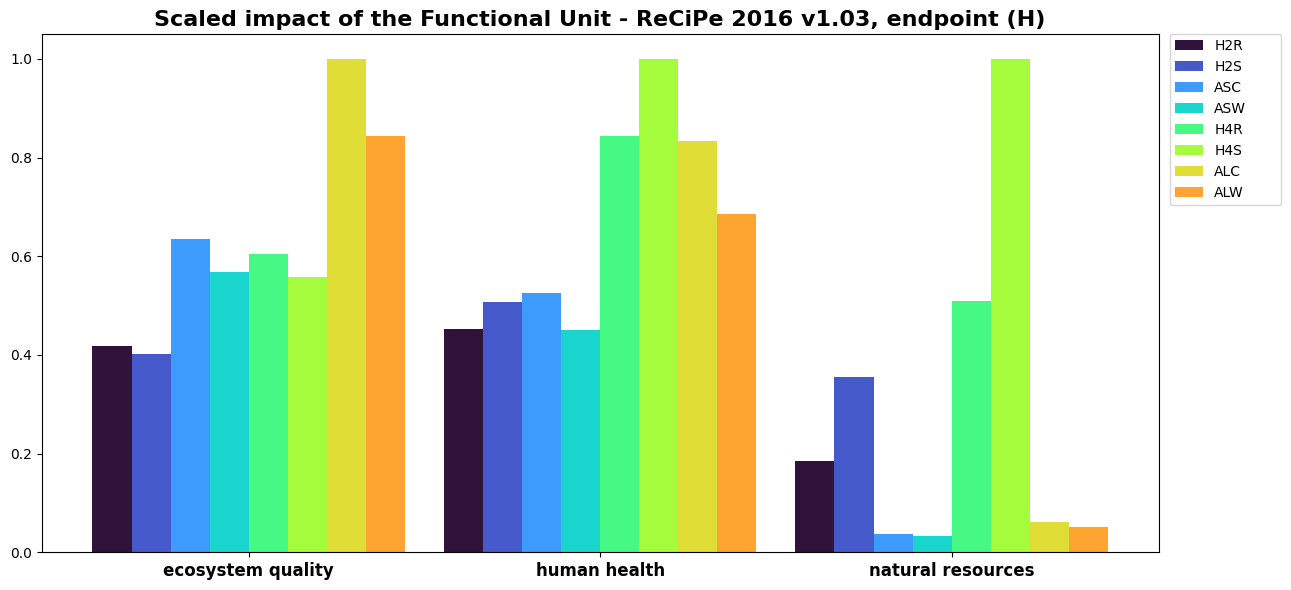

In [123]:
leg_pos_end = 0.67
if 'recipe' in lcia_method.lower():
    df_tot_e, df_scaled_e = lc.dataframe_element_scaling(df_endpoint)
    lp.scaled_FU_plot(df_scaled_e, plot_x_axis_end, inputs, impact_category[-3:], leg_pos_end)


In [124]:
if 'recipe' not in lcia_method:
    directory = 'C:\\Users\\ruw\\Desktop\\RA\\'
    lp.single_score_plot(directory, df_tot, colors, flow_legend, save_dir, db_type)

Total for H200 REC - CONSQ = 0.41243069356891193 kg CO2e
Total for H200 SU - CONSQ = 0.4650188852167797 kg CO2e
Total for alubox small + washer - CONSQ = 0.5242194239459472 kg CO2e
Total for alubox small + wipe - CONSQ = 0.44283590672714424 kg CO2e
Total for H400 REC- CONSQ = 0.7099790231998484 kg CO2e
Total for H400 SU - CONSQ = 0.860323116545504 kg CO2e
Total for alubox large + washer - CONSQ = 0.8313473795273185 kg CO2e
Total for alubox large + wipe - CONSQ = 0.6685803450897122 kg CO2e


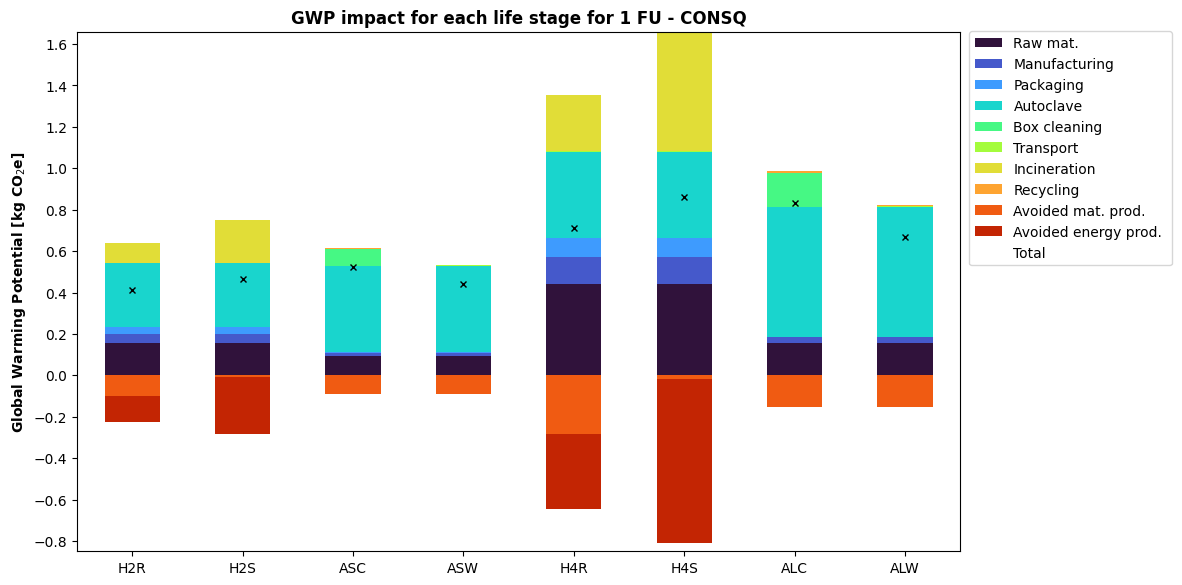

In [125]:

y_min = -0.8
y_max = 1.61
step = 0.2
leg_pos = 0.55
y_axis_values = [y_min, y_max, step, leg_pos]
df_stacked = lp.gwp_scenario_plot(df_GWP, inputs, y_axis_values)


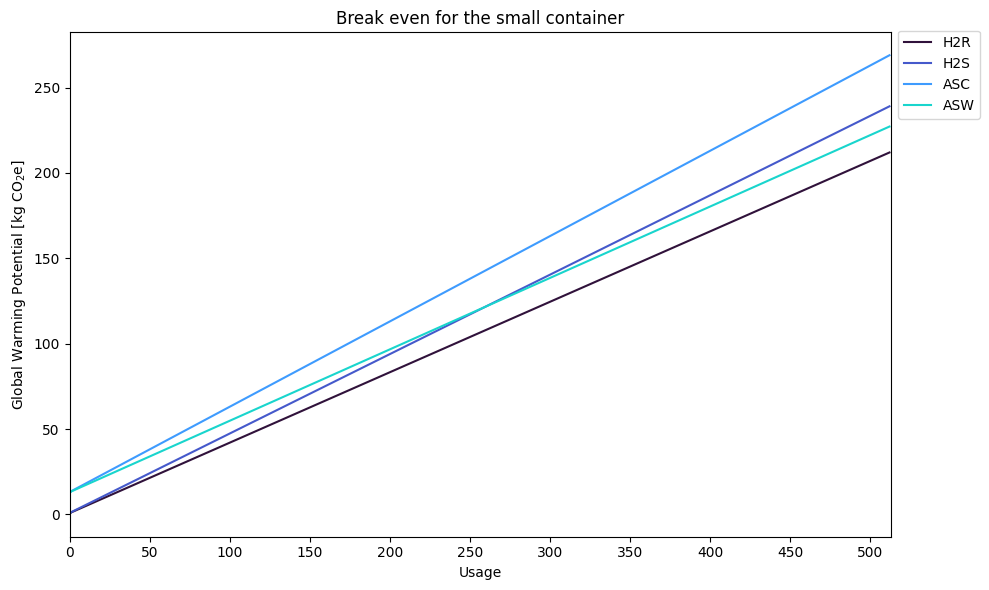

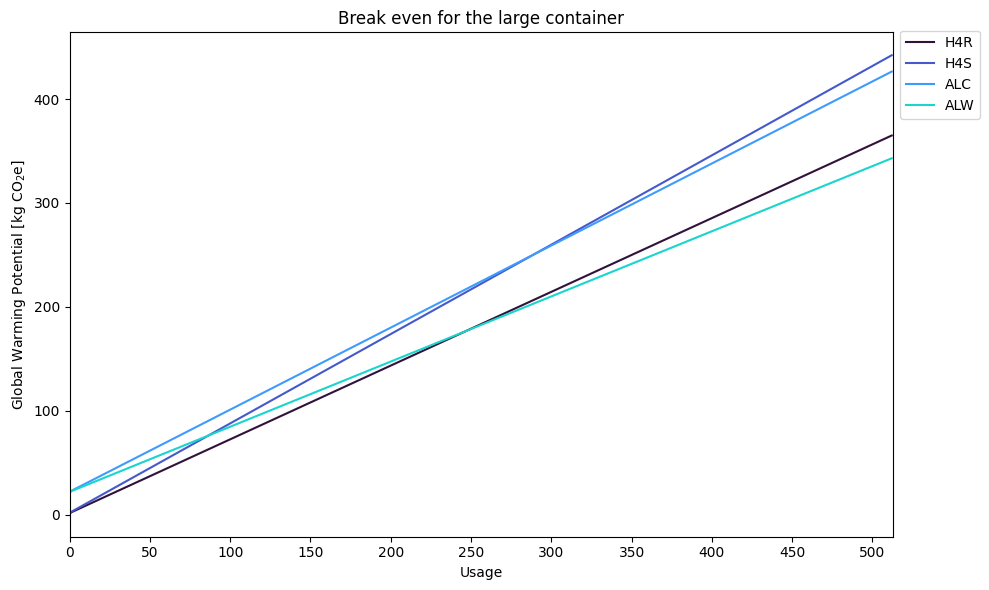

In [126]:
amount_of_uses = 513
lp.break_even_graph(df_stacked, inputs, amount_of_uses)